# Data Science - Laboratorio 1 - Series de tiempo

Sofia Velasquez 22049

José Marchena 22398

#### 0. Obtencion de datos

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
female_births = pd.read_csv('./data/daily-total-female-births.csv')
female_births['Date'] = pd.to_datetime(female_births['Date'])

car_sales = pd.read_csv('./data/monthly-car-sales.csv')
car_sales['Month'] = pd.to_datetime(car_sales['Month'])

mean_temp = pd.read_csv('./data/monthly-mean-temp.csv')
mean_temp['Month'] = pd.to_datetime(mean_temp['Month'])

shampoo = pd.read_csv('./data/shampoo.csv')
shampoo['Month'] = pd.to_datetime(shampoo['Month'], format="%m-%d")

print(female_births.shape)
print(car_sales.shape)
print(mean_temp.shape)
print(shampoo.shape)

(365, 2)
(108, 2)
(240, 2)
(36, 2)


#### 1. Analisis exploratorio

In [144]:
from scipy.stats import norm
from statsmodels.tsa.seasonal import seasonal_decompose

def analysis_graphs(df, date, value, title):
    print("Description")
    print(df.describe())
    
    print("Frequency distribution")
    plt.figure(figsize=(3, 3))
    plt.title(f"Frequency Distribution - {title}")
    _, bins, _ = plt.hist(df[value], bins=30, density=False)
    mu, sigma = np.mean(df[value]), np.std(df[value])
    x = np.linspace(min(bins), max(bins), 1000) 
    bin_width = bins[1] - bins[0]
    scale = len(df) * bin_width
    y = norm.pdf(x, mu, sigma) * scale
    plt.plot(x, y, label=f'Ideal Gaussian', color='r')
    plt.xlabel(value)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
    print("Time Series")
    df_median = df[value].median()
    plt.figure(figsize=(10, 5))
    plt.plot(df[date], df[value], '-o')
    plt.axhline(df_median, linestyle= '--', color='r', label=f"Mediana {df_median}")
    plt.title(f"Time Series - {title}")
    plt.xlabel(date)
    plt.ylabel(value)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("Seasonal Decompose")
    result = seasonal_decompose(female_births['Births'], model='additive', period=7)
    result.plot()
    

##### a) Female Births

Description
                      Date      Births
count                  365  365.000000
mean   1959-07-02 00:00:00   41.980822
min    1959-01-01 00:00:00   23.000000
25%    1959-04-02 00:00:00   37.000000
50%    1959-07-02 00:00:00   42.000000
75%    1959-10-01 00:00:00   46.000000
max    1959-12-31 00:00:00   73.000000
std                    NaN    7.348257
Frequency distribution


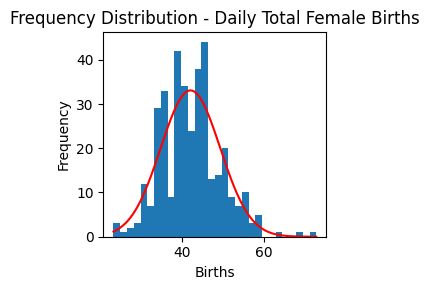

Time Series


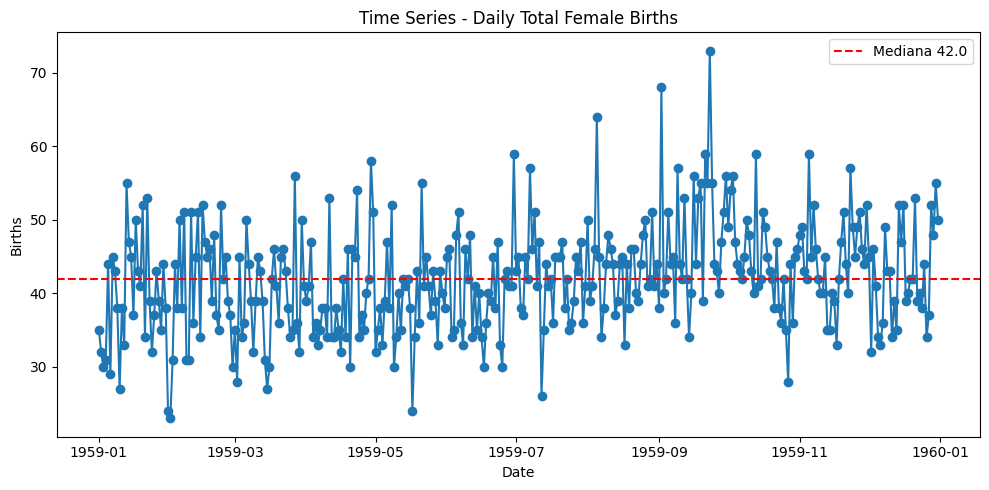

Seasonal Decompose


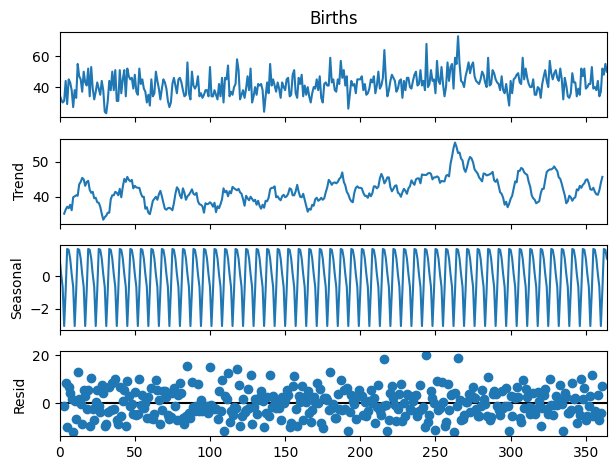

In [145]:
analysis_graphs(female_births, "Date", "Births", "Daily Total Female Births")

# No se observa ni estacionalidad ni tendencia, solo mucho ruido

#### b) Monthly Car Sales

Description
                     Month         Sales
count                  108    108.000000
mean   1964-06-16 02:40:00  14595.111111
min    1960-01-01 00:00:00   5568.000000
25%    1962-03-24 06:00:00  11391.250000
50%    1964-06-16 00:00:00  14076.000000
75%    1966-09-08 12:00:00  17595.750000
max    1968-12-01 00:00:00  26099.000000
std                    NaN   4525.213913
Frequency distribution


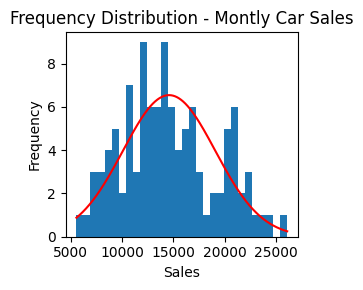

Time Series


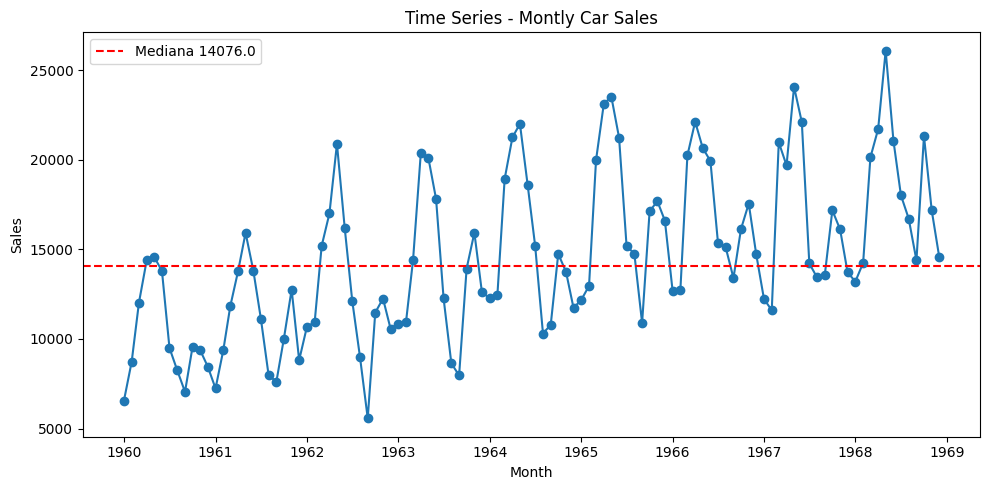

Seasonal Decompose


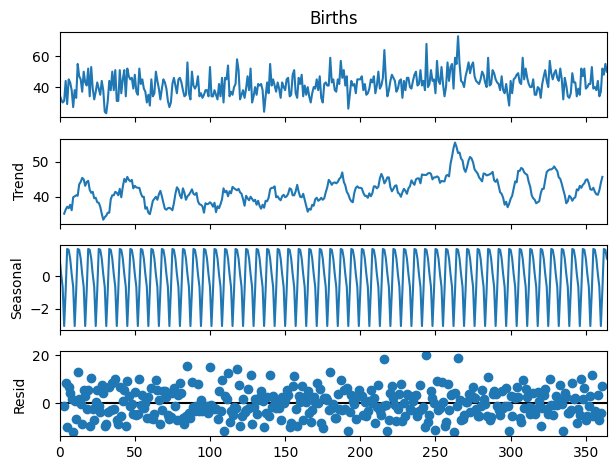

In [146]:
analysis_graphs(car_sales, "Month", "Sales", "Montly Car Sales")
# Hay tendencia y estacionalidad

#### c) Monthly Mean Temp

Description
                     Month  Temperature
count                  240   240.000000
mean   1929-12-15 23:00:00    49.041250
min    1920-01-01 00:00:00    31.300000
25%    1924-12-24 06:00:00    41.550000
50%    1929-12-16 12:00:00    47.350000
75%    1934-12-08 18:00:00    57.000000
max    1939-12-01 00:00:00    66.500000
std                    NaN     8.569705
Frequency distribution


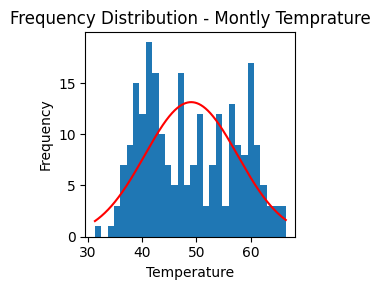

Time Series


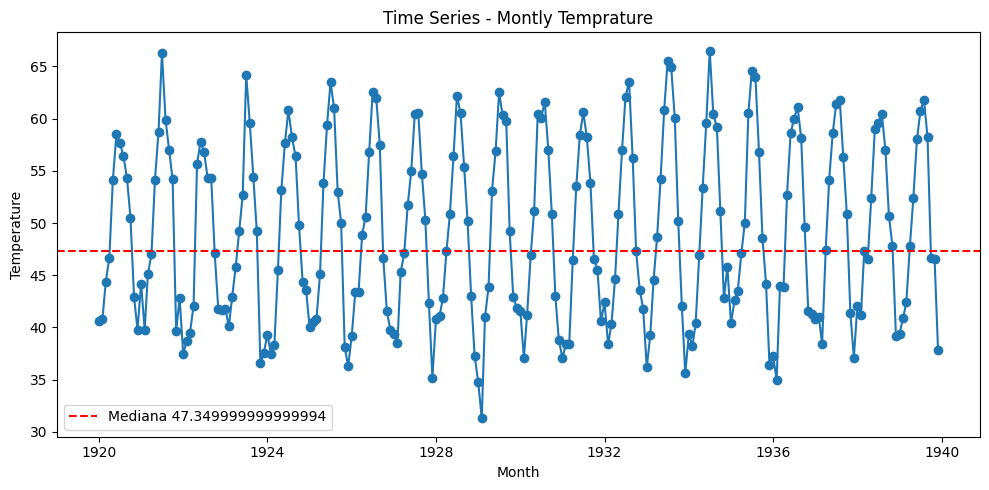

Seasonal Decompose


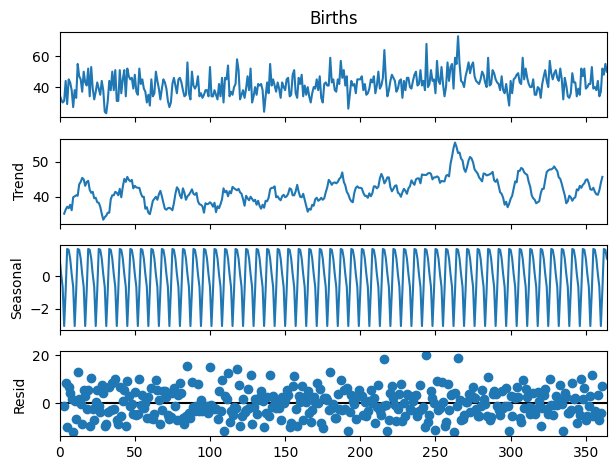

In [147]:
analysis_graphs(mean_temp, "Month", "Temperature", "Montly Temprature")
# Hay estacionalidad pero no tendencia

#### d) Shampoo

Description
                     Month       Sales
count                   36   36.000000
mean   1900-02-05 12:00:00  312.600000
min    1900-01-01 00:00:00  119.300000
25%    1900-01-09 18:00:00  192.450000
50%    1900-02-06 12:00:00  280.150000
75%    1900-03-03 06:00:00  411.100000
max    1900-03-12 00:00:00  682.000000
std                    NaN  148.937164
Frequency distribution


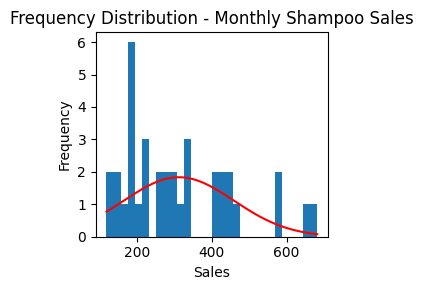

Time Series


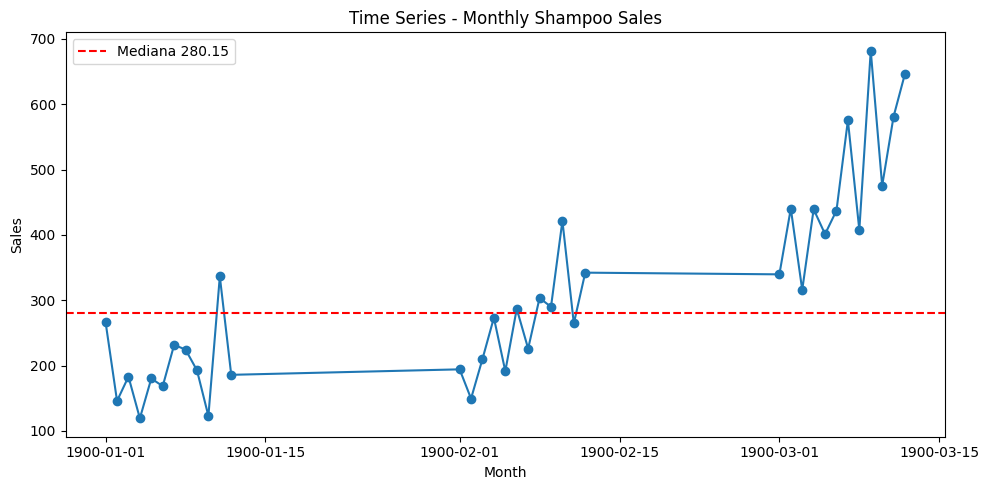

Seasonal Decompose


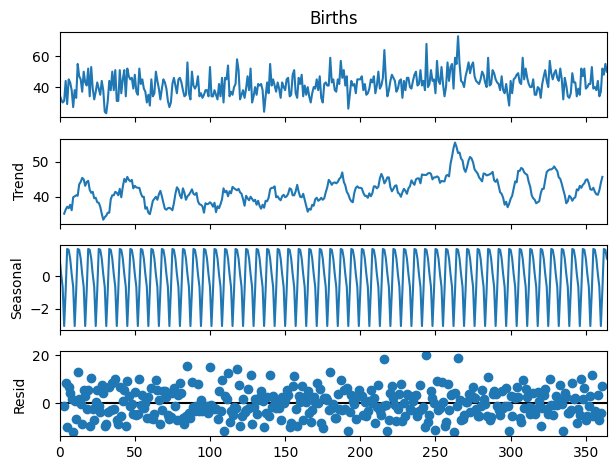

In [148]:
analysis_graphs(shampoo, "Month", "Sales", "Monthly Shampoo Sales")
# Hay tendencia y posiblemente estacionalidad, pero hay varios datos faltantes de los dias 15 en adelante del mes